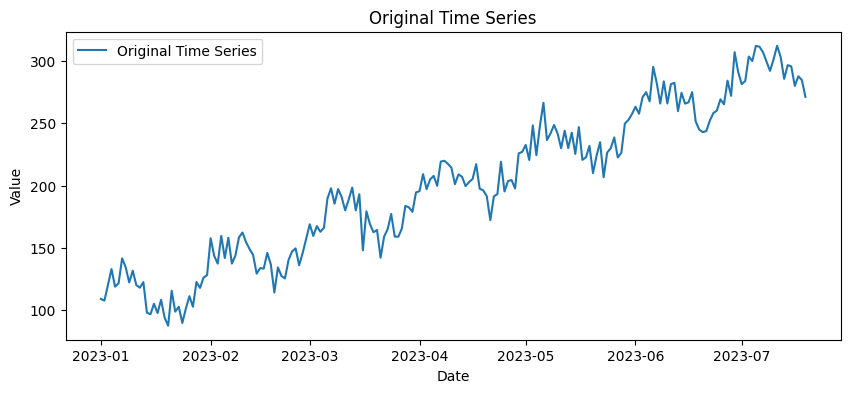

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.1632 - val_loss: 0.0619
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0183 - val_loss: 0.0421
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0246 - val_loss: 0.0185
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0105 - val_loss: 0.0492
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0164 - val_loss: 0.0207
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0082 - val_loss: 0.0070
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0085 - val_loss: 0.0068
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0086 - val_loss: 0.0104
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0072 - val_loss: 0.0133
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0069 - val_loss: 0.0100
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0076 - val_loss: 0.0072
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0065 - val_loss: 0.0075


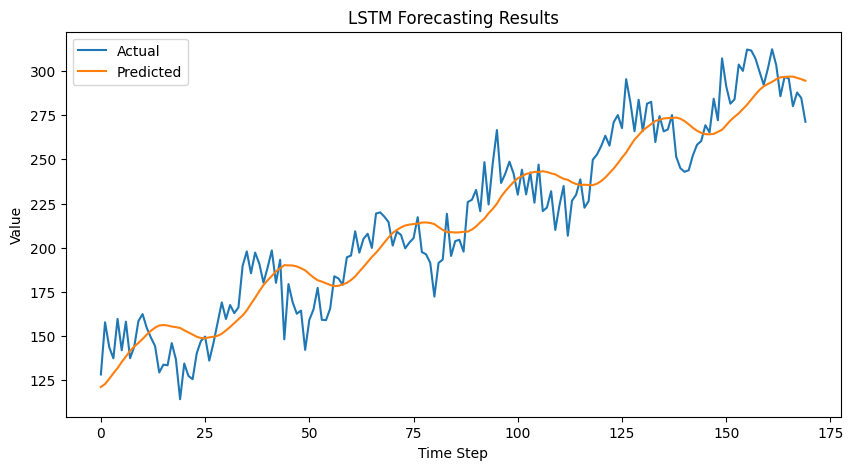

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


file_path = '/content/time_series_lstm.csv'

# Load data
df = pd.read_csv(file_path)
df.columns = ['Date', 'Value']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot original data
plt.figure(figsize=(10, 4))
plt.plot(df, label='Original Time Series')
plt.title("Original Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# === Step 2: Scale and Create Sequences ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Value']])

# Function to generate input sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30  # number of previous time steps
X, y = create_sequences(scaled_data, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# === Step 3: Build the LSTM Model ===
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# === Step 4: Train the Model ===
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# === Step 5: Forecast and Visualize ===
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot predicted vs actual
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('LSTM Forecasting Results')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()